<a href="https://colab.research.google.com/github/martinnishant/docs/blob/main/OnlineCustomer_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online retail customer dataset-RFM analysis

We have a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The company wants to segment its customers and determine marketing strategies according to these segments

The dataset consists of the following attributes:

- `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

- `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

- `Description`: Product (item) name. Nominal.

- `Quantity`: The quantities of each product (item) per transaction. Numeric.

- `InvoiceDate`: Invoice Date and time. Numeric, the day and time when each transaction was generated. The date-time format used here is `yyyy-mm-dd hh:mm:ss`

- `UnitPrice`: Unit price. Numeric, Product price per unit in pound sterling, also known as GBP (Great Britain Pound).

- `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

- `Country`: Country name. Nominal, the name of the country where each customer resides.



**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/online+retail

**Citation:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

In [1]:
import pandas as pd

url = "https://docs.google.com/spreadsheets/d/1yGxraWSt7XSsLJJp7datWmbR0f3FEg4t/export?format=xlsx"

df = pd.read_excel(url)
print(df.head())



  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
df = df.drop_duplicates()

In [5]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


In [7]:
df = df.dropna(subset=['CustomerID'])
df['CustomerID'] = df['CustomerID'].astype(int)

<ipython-input-7-2240752bbcb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)


In [10]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [11]:
# Count unique values in key columns
print(f"Unique Customers: {df['CustomerID'].nunique()}")
print(f"Unique Products: {df['StockCode'].nunique()}")
print(f"Countries: {df['Country'].nunique()}")

Unique Customers: 4372
Unique Products: 3684
Countries: 37


In [13]:
# total revenue
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $8,278,519.42


In [18]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df = df[df['Quantity'] > 0]
print(f"Dataset after removing cancellations: {df.shape[0]} rows")

Dataset after removing cancellations: 392732 rows


In [19]:
# create a yearMonthh from the invoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

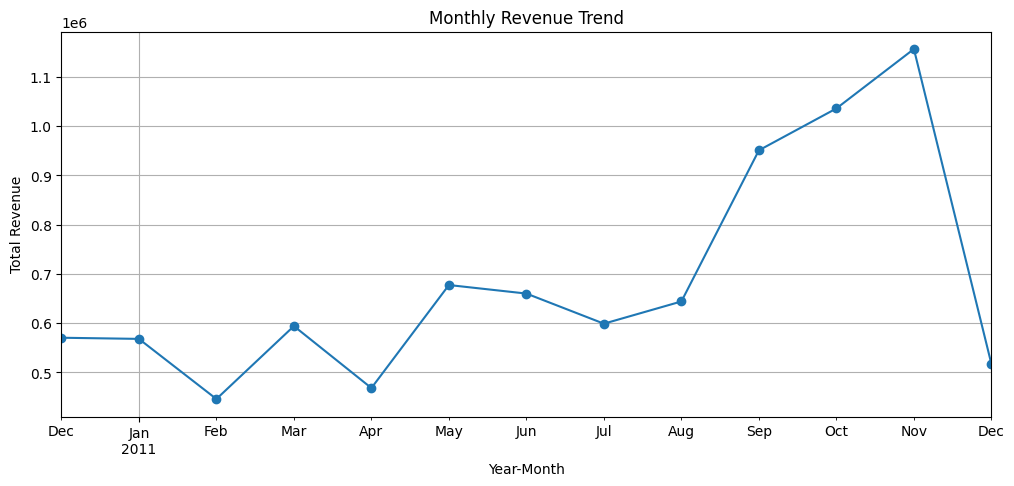

In [20]:
# try to analyse the Monthly Revenye Trend
monthly_revenue = df.groupby('YearMonth')['TotalPrice'].sum()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()

In [22]:
# assign datatype of customer as catagory
df['CustomerID'] = df['CustomerID'].astype('category')
print(df['CustomerID'].dtype)

category


In [23]:
# recency for the customer one as the catagory . --------------->>>>>>>   find the latest purchase data
reference_date = df['InvoiceDate'].max()
print(f"Reference Date: {reference_date}")

Reference Date: 2011-12-09 12:50:00


In [27]:
# find the latest recovey for each customer
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (reference_date - recency_df['InvoiceDate']).dt.days

<ipython-input-27-0ef2dc5995f1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()


In [28]:
#now print the rency for few
print(recency_df[['CustomerID', 'Recency']])

     CustomerID  Recency
0         12346      325
1         12347        1
2         12348       74
3         12349       18
4         12350      309
...         ...      ...
4334      18280      277
4335      18281      180
4336      18282        7
4337      18283        3
4338      18287       42

[4339 rows x 2 columns]


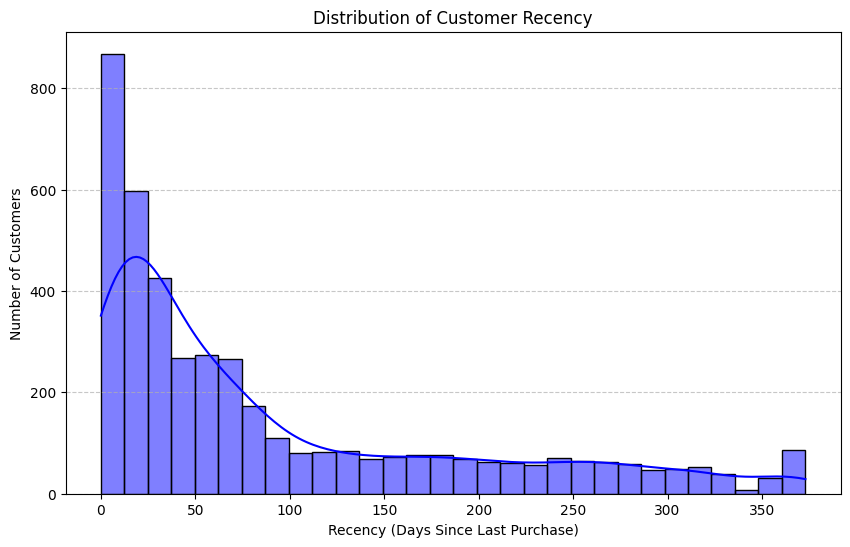

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(recency_df['Recency'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Recency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [30]:
# Count the number of unique purchases per customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']
print(frequency_df.head())

  CustomerID  Frequency
0      12346          1
1      12347          7
2      12348          4
3      12349          1
4      12350          1


<ipython-input-30-89b44d83cc70>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()


In [31]:
# Sum the total spending per customer
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']
print(monetary_df.head())

  CustomerID  Monetary
0      12346  77183.60
1      12347   4310.00
2      12348   1797.24
3      12349   1757.55
4      12350    334.40


<ipython-input-31-214b0bfed076>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()


In [32]:
# Merge Recency, Frequency, and Monetary data into one DataFrame
rfm_df = recency_df.merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')
print(rfm_df.head())

  CustomerID         InvoiceDate  Recency  Frequency  Monetary
0      12346 2011-01-18 10:01:00      325          1  77183.60
1      12347 2011-12-07 15:52:00        1          7   4310.00
2      12348 2011-09-25 13:13:00       74          4   1797.24
3      12349 2011-11-21 09:51:00       18          1   1757.55
4      12350 2011-02-02 16:01:00      309          1    334.40


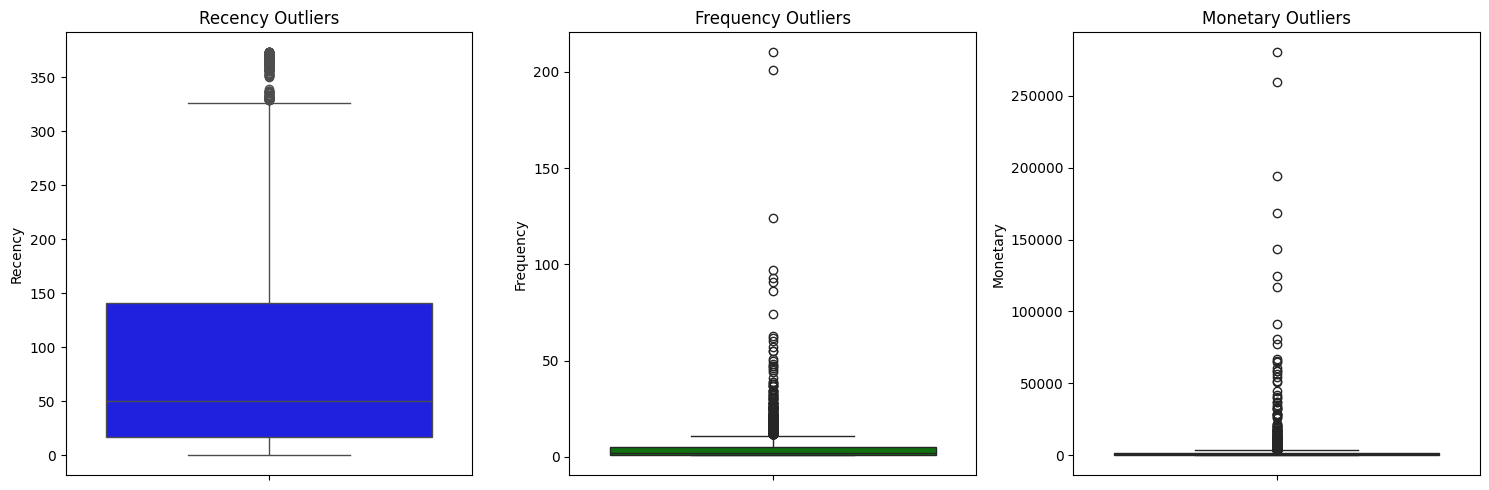

In [35]:
# trying to find outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 5))

# Recency Outliers
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_df['Recency'], color='blue')
plt.title('Recency Outliers')

# Frequency Outliers
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_df['Frequency'], color='green')
plt.title('Frequency Outliers')

# Monetary Outliers
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_df['Monetary'], color='purple')
plt.title('Monetary Outliers')

plt.tight_layout()
plt.show()



In [36]:
def find_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

recency_outliers = find_outliers(rfm_df, 'Recency')
frequency_outliers = find_outliers(rfm_df, 'Frequency')
monetary_outliers = find_outliers(rfm_df, 'Monetary')

# Display outlier counts
print(f"Recency Outliers: {len(recency_outliers)}")
print(f"Frequency Outliers: {len(frequency_outliers)}")
print(f"Monetary Outliers: {len(monetary_outliers)}")

Recency Outliers: 155
Frequency Outliers: 285
Monetary Outliers: 425


In [37]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for all RFM metrics
rfm_cleaned = remove_outliers(rfm_df, 'Recency')
rfm_cleaned = remove_outliers(rfm_cleaned, 'Frequency')
rfm_cleaned = remove_outliers(rfm_cleaned, 'Monetary')

# Display the new shape of the cleaned data
print(f"Original Data Size: {rfm_df.shape[0]}")
print(f"Cleaned Data Size: {rfm_cleaned.shape[0]}")

Original Data Size: 4339
Cleaned Data Size: 3605


In [38]:
from sklearn.preprocessing import StandardScaler

# Select only RFM values for clustering
rfm_data = rfm_cleaned[['Recency', 'Frequency', 'Monetary']]

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

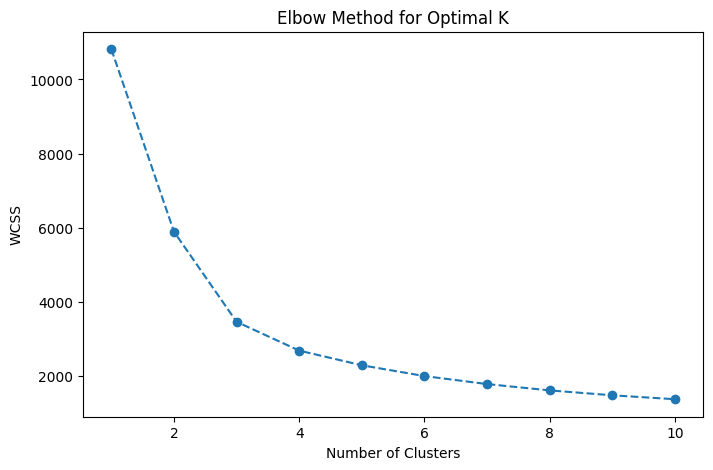

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [40]:
# Apply K-Means with k = 4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_cleaned['Cluster'] = kmeans.fit_predict(rfm_scaled)

# View first few rows
rfm_cleaned.head()

,CustomerID,InvoiceDate,Recency,Frequency,Monetary,Cluster
2,12348,2011-09-25 13:13:00,74,4,1797.24,1
3,12349,2011-11-21 09:51:00,18,1,1757.55,1
4,12350,2011-02-02 16:01:00,309,1,334.40,2
5,12352,2011-11-03 14:37:00,35,8,2506.04,3
6,12353,2011-05-19 17:47:00,203,1,89.00,2


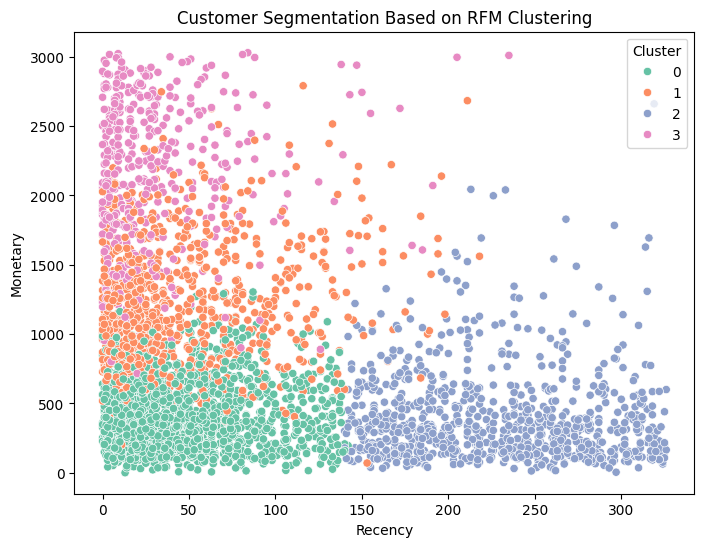

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm_cleaned, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation Based on RFM Clustering')
plt.show()